In [140]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

In [141]:
dfTrain = pd.read_csv('train.csv')
dfTrain = dfTrain[dfTrain['churn_risk_score'] != -1]

In [142]:
dfTrain.head(3)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5


In [143]:
# checking for total null values
dfTrain.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [144]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   35829 non-null  object 
 1   Name                          35829 non-null  object 
 2   age                           35829 non-null  int64  
 3   gender                        35829 non-null  object 
 4   security_no                   35829 non-null  object 
 5   region_category               30566 non-null  object 
 6   membership_category           35829 non-null  object 
 7   joining_date                  35829 non-null  object 
 8   joined_through_referral       35829 non-null  object 
 9   referral_id                   35829 non-null  object 
 10  preferred_offer_types         35553 non-null  object 
 11  medium_of_operation           35829 non-null  object 
 12  internet_option               35829 non-null  object 
 13  l

# Data Visualization

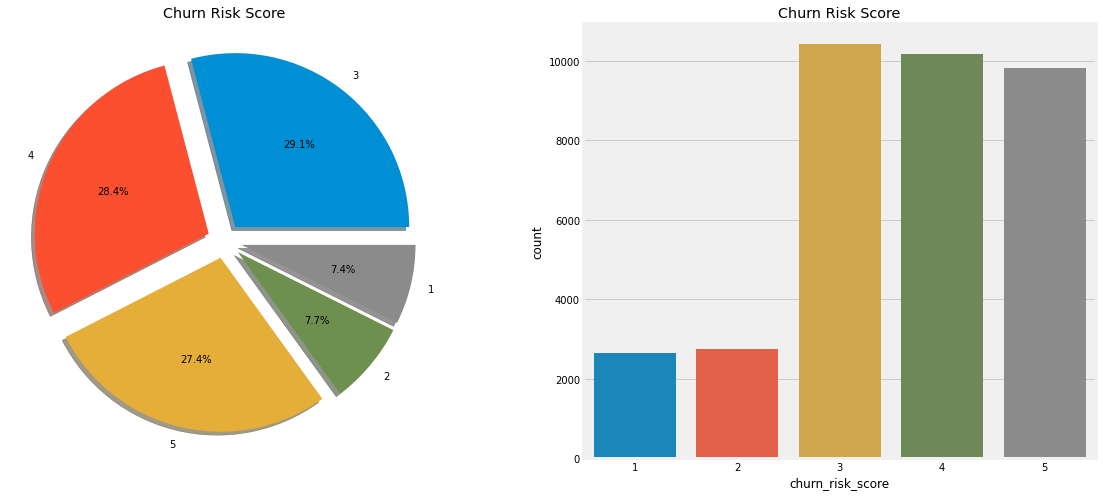

In [145]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

# axes[0]
dfTrain['churn_risk_score'].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1, 0.1], autopct = '%1.1f%%',
                                                   ax = axes[0], shadow = True)
axes[0].set_title('Churn Risk Score')
axes[0].set_ylabel('')

# axes[1]
sns.countplot('churn_risk_score', data = dfTrain, ax = axes[1])
axes[1].set_title('Churn Risk Score')

plt.show()

# Preprocessing

## Null and Inconsistent Values

In [146]:
# we have unknown values in column gender, so we will drop it
dfTrain = dfTrain[dfTrain['gender'] != 'Unknown'].reset_index(drop = True)

# we have 5263 null values in column region category, it's high null values, so we will add new category 'Other'
dfTrain['region_category'] = dfTrain['region_category'].fillna('Other')

dfTrain['membership_category'] = dfTrain['membership_category'].str.split().str[0]

# we have '?' in joined through referral column, so we will replaced based on referral id
for i in range(len(dfTrain)) :
    if dfTrain['joined_through_referral'][i] == '?' :
        if dfTrain['referral_id'][i] == 'xxxxxxxx' :
            dfTrain['joined_through_referral'][i] = 'No'
        else :
            dfTrain['joined_through_referral'][i] = 'Yes'
            
# we have null values in preferred offer types, we will changed null values with based on the mode in this column
dfTrain['preferred_offer_types'] = dfTrain['preferred_offer_types'].fillna('Gift Vouchers/Coupons')

# we have '?' values, so we will changed to new category 'Other'
dfTrain['medium_of_operation'] = dfTrain['medium_of_operation'].replace(r'^\?', 'Other', regex = True)

#avg frequency
dfTrain['avg_frequency_login_days'] = pd.to_numeric(dfTrain['avg_frequency_login_days'],errors='coerce')
avg = round(dfTrain['avg_frequency_login_days'].mean())
dfTrain['avg_frequency_login_days'].fillna(avg,inplace=True)

#points_in_wallet
avg = round(dfTrain['points_in_wallet'].mean())
dfTrain['points_in_wallet'].fillna(avg,inplace=True)

## Feature Engineering

In [147]:
# we take year from column joining date
dfTrain['joining_year'] = dfTrain['joining_date'].str[:4]

# we take hour from column last visit time
dfTrain['last_visit_hours'] = dfTrain['last_visit_time'].str[:2]
dfTrain['last_visit_hours'] = dfTrain['last_visit_hours'].astype('int')

## Label Encoding

In [148]:
dfTrain['gender'].replace(['M', 'F'], [0, 1], inplace = True)
dfTrain['membership_category'].replace(['No', 'Basic', 'Silver', 'Gold', 'Platinum', 'Premium'],
                                      [0, 1, 2, 3, 4, 5], inplace = True)
dfTrain['joining_year'].replace(['2015', '2016', '2017'], [0, 1, 2], inplace = True)
dfTrain['joined_through_referral'].replace(['No', 'Yes'], [0, 1], inplace = True)
dfTrain['used_special_discount'].replace(['No', 'Yes'], [0, 1], inplace = True)
dfTrain['offer_application_preference'].replace(['No', 'Yes'], [0, 1], inplace = True)
dfTrain['past_complaint'].replace(['No', 'Yes'], [0, 1], inplace = True)
dfTrain['feedback'].replace(['Poor Product Quality', 'No reason specified', 'Poor Customer Service',
                            'Poor Website' , 'Too many ads', 'Quality Customer Care', 'User Friendly Website',
                            'Products always in Stock', 'Reasonable Price'], [0, 0, 0, 0, 0, 1, 1, 1, 1], inplace = True)

## Dropping Unneed Features

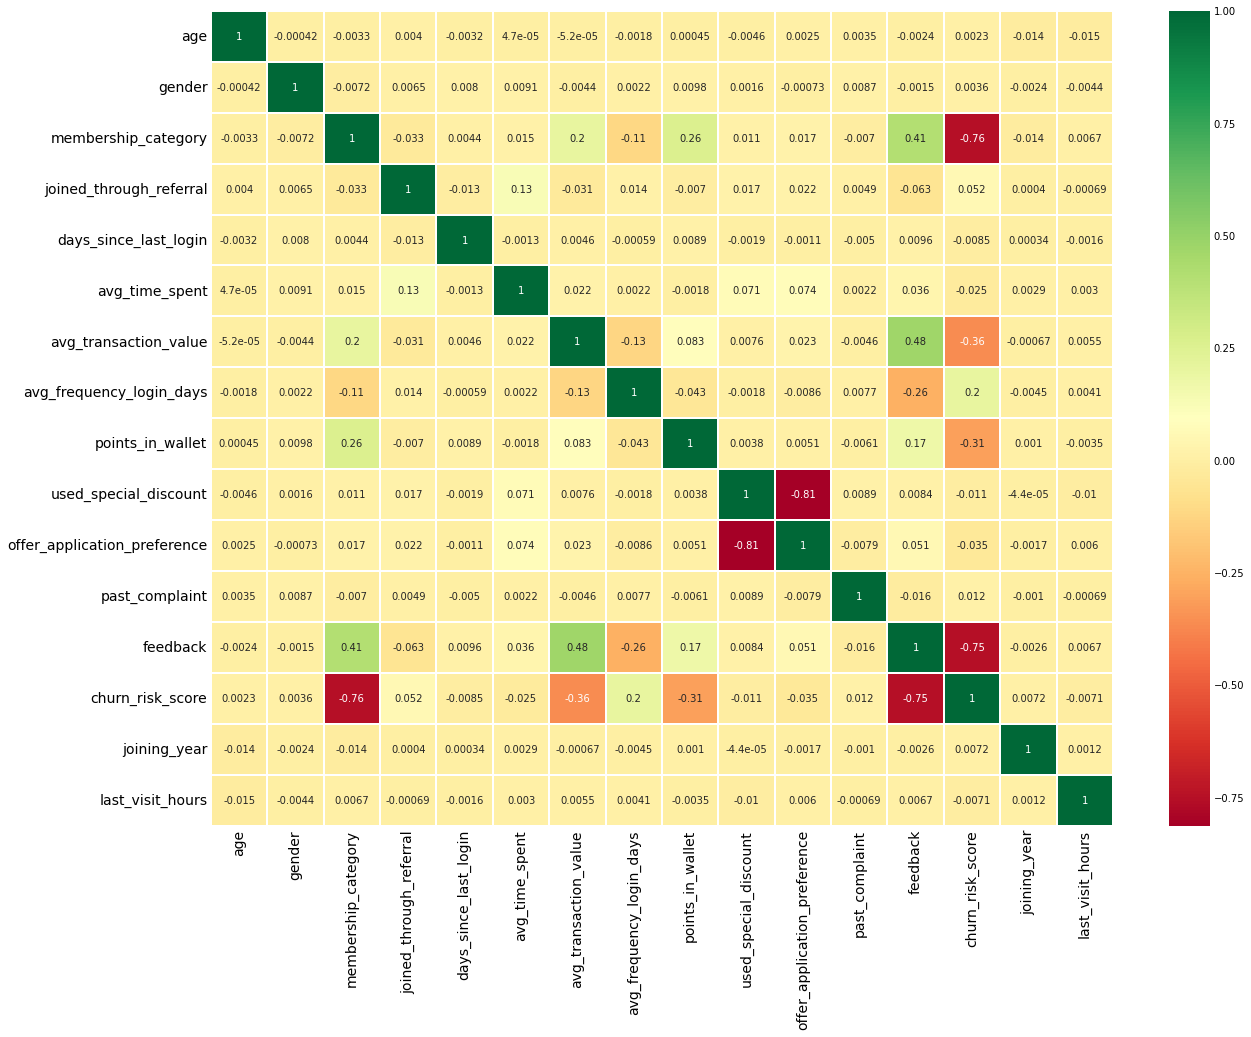

In [149]:
dfTrain.drop(columns = ['customer_id', 'Name', 'security_no', 'referral_id', 'joining_date', 'last_visit_time', ], inplace = True)
sns.heatmap(dfTrain.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 10})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Dummies

In [150]:
#dummies
dfTrain = pd.get_dummies(dfTrain, columns = ['region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status'])

In [151]:
dfTrain.head(5)

,age,gender,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_year,last_visit_hours,region_category_City,region_category_Other,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Other,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
0,18,1,4,0,17,300.63,53005.25,17.0,781.75,1,1,0,1,2,2,16,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
1,32,1,5,1,16,306.34,12838.38,10.0,687.00,1,0,1,1,1,2,12,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,44,1,0,1,14,516.16,21027.00,22.0,500.69,0,1,1,0,5,1,22,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
3,37,0,0,1,11,53.27,25239.56,6.0,567.66,0,1,1,0,5,1,15,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,31,1,0,0,20,113.13,24483.66,16.0,663.06,0,1,1,0,5,2,15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


# Predictive Modelling

In [183]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm
from sklearn.svm import LinearSVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from xgboost import XGBClassifier #XGB
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [153]:
scaler = RobustScaler()
col = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'last_visit_hours']
dfTrain[col] = scaler.fit_transform(dfTrain[col])

X = dfTrain.drop(['churn_risk_score'], axis = 1)
Y = dfTrain[['churn_risk_score']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=11)

smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

### SVM

In [162]:
model = LinearSVC(C = 0.1, multi_class = 'crammer_singer')
model.fit(X_train, y_train)
predSVC = model.predict(X_test)
print(f"Report Metrics SVM \n {classification_report(y_test, predSVC)}")

Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.58      0.69      0.63       529
           2       0.64      0.52      0.57       548
           3       0.71      0.98      0.82      2081
           4       0.87      0.02      0.04      2035
           5       0.62      1.00      0.76      1962

    accuracy                           0.66      7155
   macro avg       0.68      0.64      0.57      7155
weighted avg       0.72      0.66      0.55      7155



### Logistic Regression

In [163]:
model = LogisticRegression(multi_class = 'multinomial')
model.fit(X_train, y_train)
predLR = model.predict(X_test)
print(f"Report Metrics Logistic Regression \n {classification_report(y_test, predLR)}")

Report Metrics Logistic Regression 
               precision    recall  f1-score   support

           1       0.58      0.51      0.55       529
           2       0.57      0.63      0.60       548
           3       0.77      0.77      0.77      2081
           4       0.43      0.48      0.45      2035
           5       0.67      0.59      0.63      1962

    accuracy                           0.61      7155
   macro avg       0.60      0.60      0.60      7155
weighted avg       0.62      0.61      0.61      7155



### Decision Tree

In [164]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predDT = model.predict(X_test)
print(f"Report Metrics Decision Tree \n {classification_report(y_test, predDT)}")

Report Metrics Decision Tree 
               precision    recall  f1-score   support

           1       0.67      0.71      0.69       529
           2       0.71      0.67      0.69       548
           3       0.92      0.91      0.91      2081
           4       0.66      0.67      0.67      2035
           5       0.75      0.74      0.74      1962

    accuracy                           0.76      7155
   macro avg       0.74      0.74      0.74      7155
weighted avg       0.76      0.76      0.76      7155



### KNN

In [165]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
predKNN = model.predict(X_test)
print(f"Report Metrics KNN \n {classification_report(y_test, predKNN)}")

Report Metrics KNN 
               precision    recall  f1-score   support

           1       0.46      0.59      0.52       529
           2       0.41      0.46      0.43       548
           3       0.74      0.73      0.73      2081
           4       0.50      0.41      0.45      2035
           5       0.66      0.71      0.69      1962

    accuracy                           0.60      7155
   macro avg       0.55      0.58      0.56      7155
weighted avg       0.60      0.60      0.60      7155



### XGB

In [178]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
predXGB = model.predict(X_test)
print(f"Report Metrics XGB \n {classification_report(y_test, predXGB)}")

[13:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Report Metrics XGB 
               precision    recall  f1-score   support

           1       0.71      0.78      0.74       529
           2       0.76      0.69      0.72       548
           3       0.92      0.92      0.92      2081
           4       0.71      0.59      0.65      2035
           5       0.71      0.84      0.77      1962

    accuracy                           0.78      7155
   macro avg       0.76      0.76      0.76      7155
weighted avg       0.78      0.78      0.77      7155



### Random Forest

In [169]:
model = RandomForestClassifier(n_estimators = 140)
model.fit(X_train, y_train)
predRF = model.predict(X_test)
print(f"Report Metrics Random Forest \n {classification_report(y_test, predRF)}")

Report Metrics Random Forest 
               precision    recall  f1-score   support

           1       0.71      0.76      0.73       529
           2       0.75      0.70      0.72       548
           3       0.90      0.93      0.91      2081
           4       0.75      0.51      0.61      2035
           5       0.69      0.90      0.78      1962

    accuracy                           0.77      7155
   macro avg       0.76      0.76      0.75      7155
weighted avg       0.77      0.77      0.76      7155



## Grid Search

In [184]:
pipe_lr = Pipeline([('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('XGB', XGBClassifier(random_state=42))])

In [185]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

In [186]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=3)

In [187]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

[21:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [188]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.6642907058001397
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7888190076869322
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.7710691823899372
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.6261355695317959
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
Support Vector Machines Test Accuracy: 0.6545073375262055
Support Vector Machines Best Params: {'SVM__C': 6, 'SVM__kernel': 'rbf'}
XGBoost Test Accuracy: 0.7724668064290706
XGBoost Best Params: {'XGB__learning_rate': 0.3, 'XGB__max_depth': 6, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 0.5}


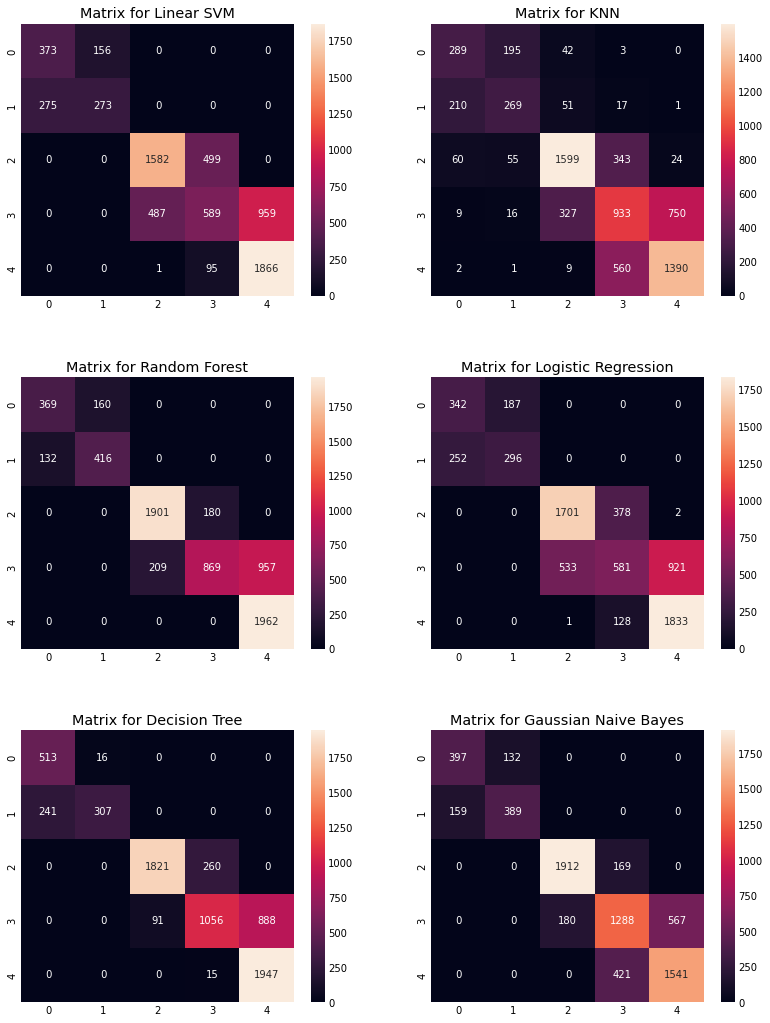

In [197]:
fig, axes = plt.subplots(3, 2, figsize = (12, 18))

# ax[0,0] --> svm
y_pred = svm_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[0,0], annot = True, fmt = '2.0f')
axes[0,0].set_title('Matrix for Linear SVM')

# ax[0,1] --> KNN
y_pred = knn_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[0,1], annot = True, fmt = '2.0f')
axes[0,1].set_title('Matrix for KNN')

# ax[1,0] --> random forest
y_pred = rf_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1,0], annot = True, fmt = '2.0f')
axes[1,0].set_title('Matrix for Random Forest')

# ax[1,1] --> logistic regression
y_pred = lr_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1,1], annot = True, fmt = '2.0f')
axes[1,1].set_title('Matrix for Logistic Regression')

# ax[2,0] --> decision tree
y_pred = dt_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[2,0], annot = True, fmt = '2.0f')
axes[2,0].set_title('Matrix for Decision Tree')

# ax[2,1] --> xgb
y_pred = xgb_grid_search.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[2,1], annot = True, fmt = '2.0f')
axes[2,1].set_title('Matrix for Gaussian Naive Bayes')

plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()